# **Evolutionary Computing, lab 4 - Report**

**Authors**:
* **Kuba Czech**, 156035
* **Wojciech Nagórka**, 156045

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Description of the problem** ##

We are given a set of nodes, each defined by its x and y coordinates and an associated cost. The task is to select exactly half of the nodes (rounded up if the number is odd) and construct a Hamiltonian cycle that visits each selected node exactly once and returns to the starting node. The objective is to minimize the total sum of both the path length (computed using rounded Euclidean distances between nodes) and the costs of the selected nodes.

## **2. Pseudocode of implemented algorithms** ##

### **2.1. Data**
**Input:**
- $n$: total number of nodes  
- $nodes[i] = (x_i, y_i, cost_i)$ for $i \in [0, n-1]$: array with all nodes
- $distanceMatrix[i][j] = \text{round}\!\left(\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}\right)$: euclidean distance between i-th and j-th node
- $candidateEdges[i] = \text{top 10 nearest vertices for i-th node}$

**Output:**
- $route: \text{list of nodes forming a closed Hamiltonian cycle}$
- $totalCost = \text{distance cost} + \text{node costs}$

### **2.2. Implementation of starting solution**

```text
function randomSolution()
    route ← list of integers [0, 1, 2, ..., n-1]
    shuffle(route)

    route ← elements of route from 0 up to targetCount
    route.add(route[0])

    totalCost ← computeTotalCost(route)

    return Result(route, totalCost)

### **2.3. Implementation of Steepest Local Search with Candidate Movements**

```text
function steepestSearch(route, neighbourhood):
    bestDelta = 0
    for move in neighbourhood:
        delta = compute difference between current route and route after applying move
        bestMove = null

        if bestDelta == 0:
            bestDelta = delta
            bestMove = move
        elif bestDelta > delta:
            new_route = applyMove(route, move)
            bestMove = move
    return applyMove(route, bestMove)

### **2.4.Implementation of different types of neighbourhood**

#### **2.4.1. Intra-route**

##### **2.4.1.1. Two nodes exchange**

```text
function generateTwoNodesExhange(route):
    moves ← empty set
    n ← length(route)

    for i from 0 to n - 1:
        nodeI ← route[i]
        nearest ← candidateEdges[nodeI]

        for each neighbor in nearest:
            j ← index of neighbor in route
            if j exists AND j > i:
                add Move(SWAP_NODES, i, j) to moves


##### **2.4.1.2. Two edges exchange**

```text
function generateTwoEdgesExchange(route):
    moves ← empty set
    n ← length(route)

    for i from 0 to n - 2:
        nodeI ← route[i]
        nearest ← candidateEdges[nodeI]

        for each neighbor in nearest:
            j ← index of neighbor in route
            if j exists AND j > i + 1 AND NOT (i = 0 AND j = n - 1):
                add Move(TWO_OPT, i, j) to moves

#### **2.4.2. Inter-route**

```text
function generateInterRouteMoves(route):
    moves ← empty set
    n ← length(route)

    selected ← set of all nodes in route
    for i from 0 to n - 1:
        selectedNode ← route[i]
        nearest ← candidateEdges[selectedNode]

        for each neighbor in nearest:
           if neighbor not in selected:
                add Move(EXCHANGE_SELECTED_UNSELECTED, i, neighbor) to moves

#### **2.4.3. Function to generate neighbourhood**

```text
function generateNeighbourhood(useNodeExchange, route):
    if useNodeExchange:
        moves_intra = generateTwoNodesExchange(route)
    else:
        moves_intra = generateTwoEdgesExchange(route)
    moves_inter = generateInterRouteMoves(route)

    return (moves_intra + moves_inter)

### **2.5. Solution**

```text
function steepestWithCandidates(useNodeExchange):
    route = randomSolution()
    improvement = True
    while improvement:
        neighbourhood = generateNeighbourhood(useNodeExchange, route)
        route = steepestSearch(route, neighbourhood)
        if no improvement:
            improvement = False
    return route

## **3. Results of computational experiments** ##

### **3.1. Stats** ###

#### **3.1.1. Instance A** 

In [12]:
stats = pd.read_csv('evaluation/TSPA_stats.csv')
new_index = ['steepest_edge_random_with_candidates', 'steepest_node_random_with_candidates']
stats.method_name = new_index
# stats

In [13]:
# stats_lab1 = pd.read_csv('../lab1/evaluation/TSPA_stats.csv')
# stats_lab2 = pd.read_csv('../lab2/evaluation/TSPA_stats.csv')
# pd.concat([stats_lab1, stats_lab2, stats]).reset_index(drop=True)
stats_lab3 = pd.read_csv('../lab3/evaluation/TSPA_local_stats.csv')
stats_lab3 = stats_lab3[stats_lab3.method_name.str.startswith('steepest')]
# stats_lab3

In [14]:
stats_all = pd.concat([stats_lab3, stats]).reset_index(drop=True).sort_values(by='method_name')
stats_all

,method_name,min,max,avg,sd
1,steepest_edge_heuristic,69540.0,72546.0,70722.88,554.35
3,steepest_edge_random,71425.0,78608.0,73883.91,1260.80
4,steepest_edge_random_with_candidates,76777.0,93182.0,83290.13,2550.57
0,steepest_node_heuristic,69850.0,75452.0,72163.14,1385.16
2,steepest_node_random,81210.0,99256.0,88726.55,3274.45
5,steepest_node_random_with_candidates,106017.0,138080.0,120543.48,5857.83


#### **3.1.2. Instance B** 

In [15]:
stats = pd.read_csv('evaluation/TSPB_stats.csv')
new_index = ['steepest_edge_random_with_candidates', 'steepest_node_random_with_candidates']
stats.method_name = new_index

In [16]:
stats_lab3 = pd.read_csv('../lab3/evaluation/TSPB_local_stats.csv')
stats_lab3 = stats_lab3[stats_lab3.method_name.str.startswith('steepest')]

In [17]:
stats_all = pd.concat([stats_lab3, stats]).reset_index(drop=True).sort_values(by='method_name').reset_index(drop=True)
stats_all

,method_name,min,max,avg,sd
0,steepest_edge_heuristic,44320.0,51431.0,46347.17,1450.58
1,steepest_edge_random,46002.0,51158.0,48523.47,1062.92
2,steepest_edge_random_with_candidates,47689.0,55502.0,50497.77,1502.80
3,steepest_node_heuristic,44507.0,54347.0,47186.60,1683.80
4,steepest_node_random,55594.0,70220.0,63151.57,2881.23
5,steepest_node_random_with_candidates,70056.0,97689.0,83637.79,5417.49


### **3.2. Times** ###

#### **3.2.1. Instance A**

In [8]:
times = pd.read_csv('evaluation/TSPA_times.csv')
times.time = round(times.time / 1e6).astype(int)
times.rename(columns={'method': 'method_name', 'time': 'time (ms)'}, inplace=True)
new_index = ['steepest_edge_random_with_candidates', 'steepest_node_random_with_candidates']
times.method_name = new_index

times_lab3 = pd.read_csv('../lab3/evaluation/TSPA_local_times.csv')
times_lab3.rename(columns={'time_ms': 'time (ms)'}, inplace=True)
times_lab3 = times_lab3[times_lab3.method_name.str.startswith('steepest')]

times_all = pd.concat([times_lab3, times]).reset_index(drop=True).sort_values(by='method_name').reset_index(drop=True)
times_all

,method_name,time (ms)
0,steepest_edge_heuristic,332
1,steepest_edge_random,5586
2,steepest_edge_random_with_candidates,1893
3,steepest_node_heuristic,112
4,steepest_node_random,6305
5,steepest_node_random_with_candidates,2047


#### **3.2.2. Instance B**

In [9]:
times = pd.read_csv('evaluation/TSPB_times.csv')
times.time = round(times.time / 1e6).astype(int)
times.rename(columns={'method': 'method_name', 'time': 'time (ms)'}, inplace=True)
new_index = ['steepest_edge_random_with_candidates', 'steepest_node_random_with_candidates']
times.method_name = new_index

times_lab3 = pd.read_csv('../lab3/evaluation/TSPB_local_times.csv')
times_lab3.rename(columns={'time_ms': 'time (ms)'}, inplace=True)
times_lab3 = times_lab3[times_lab3.method_name.str.startswith('steepest')]

times_all = pd.concat([times_lab3, times]).reset_index(drop=True).sort_values(by='method_name').reset_index(drop=True)
times_all

,method_name,time (ms)
0,steepest_edge_heuristic,520
1,steepest_edge_random,5648
2,steepest_edge_random_with_candidates,2043
3,steepest_node_heuristic,220
4,steepest_node_random,6287
5,steepest_node_random_with_candidates,2584


### **3.3. Reporting results**

In [10]:
stats_a = pd.read_csv('evaluation/TSPA_stats.csv')
stats_a['Instance 1'] = stats_a['avg'].astype(str) + " * (" + stats_a['max'].astype(str) + " - " + stats_a['min'].astype(str) + ")"
stats_a = stats_a[['method_name', 'Instance 1']]

stats_b = pd.read_csv('evaluation/TSPB_stats.csv')
stats_b['Instance 2'] = stats_b['avg'].astype(str) + " * (" + stats_b['max'].astype(str) + " - " +  stats_b['min'].astype(str) + ")"
stats_b = stats_b[['method_name', 'Instance 2']]

stats_all = pd.merge(stats_a, stats_b, on='method_name')
stats_all

,method_name,Instance 1,Instance 2
0,candidate_moves_heuristic_without_nodes_exchange,83290.13 * (93182.0 - 76777.0),50497.77 * (55502.0 - 47689.0)
1,candidate_moves_heuristic_with_nodes_exchange,120543.48 * (138080.0 - 106017.0),83637.79 * (97689.0 - 70056.0)


## **4. 2D Visualization** ##

### **Reading TSP A and TSP B instances** ##

In [6]:
tsp_a = pd.read_csv('../data/TSPA.csv', sep=';', header=None)
tsp_a.columns = ['x', 'y', 'cost']

tsp_b = pd.read_csv('../data/TSPB.csv', sep=';', header=None)
tsp_b.columns = ['x', 'y', 'cost']

### **Reading files with best solutions** ##

In [8]:
instances = []

for instance, data in [("TSPA", tsp_a), ("TSPB", tsp_b)]:
    for useNodesExchange in ["with", "without"]:
        method_name = f"{instance}_candidate_moves_heuristic_{useNodesExchange}_nodes_exchange.csv"
        plot_title = f"2D Visualization of steepest local search with use of candidate moves {useNodesExchange} nodes exchange for {instance} instance"
        solution = np.array(pd.read_csv(f'evaluation/results/{method_name}', sep=';', header=None).values).flatten()
        instances.append((data, solution, plot_title))

In [9]:
def plot_tsp(tsp, solution, title):
    unused_nodes = np.array(set(tsp.index).difference(solution))
    X = tsp['x'].loc[solution].values
    Y = tsp['y'].loc[solution].values
    costs = tsp['cost'].loc[solution].values

    X_unused = tsp['x'].loc[unused_nodes].values
    Y_unused = tsp['y'].loc[unused_nodes].values
    costs_unused = tsp['cost'].loc[unused_nodes].values

    plt.figure(figsize=(15, 9))
    plt.scatter(X, Y, s=costs, color='red', alpha=0.4, label='Data points')
    plt.scatter(X_unused, Y_unused, s=costs_unused, color="grey", alpha=0.4, label="Unused nodes")
    plt.scatter(X, Y, color='blue')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.plot(X, Y, color='blue', linestyle='-', linewidth=2, label='Connecting line')

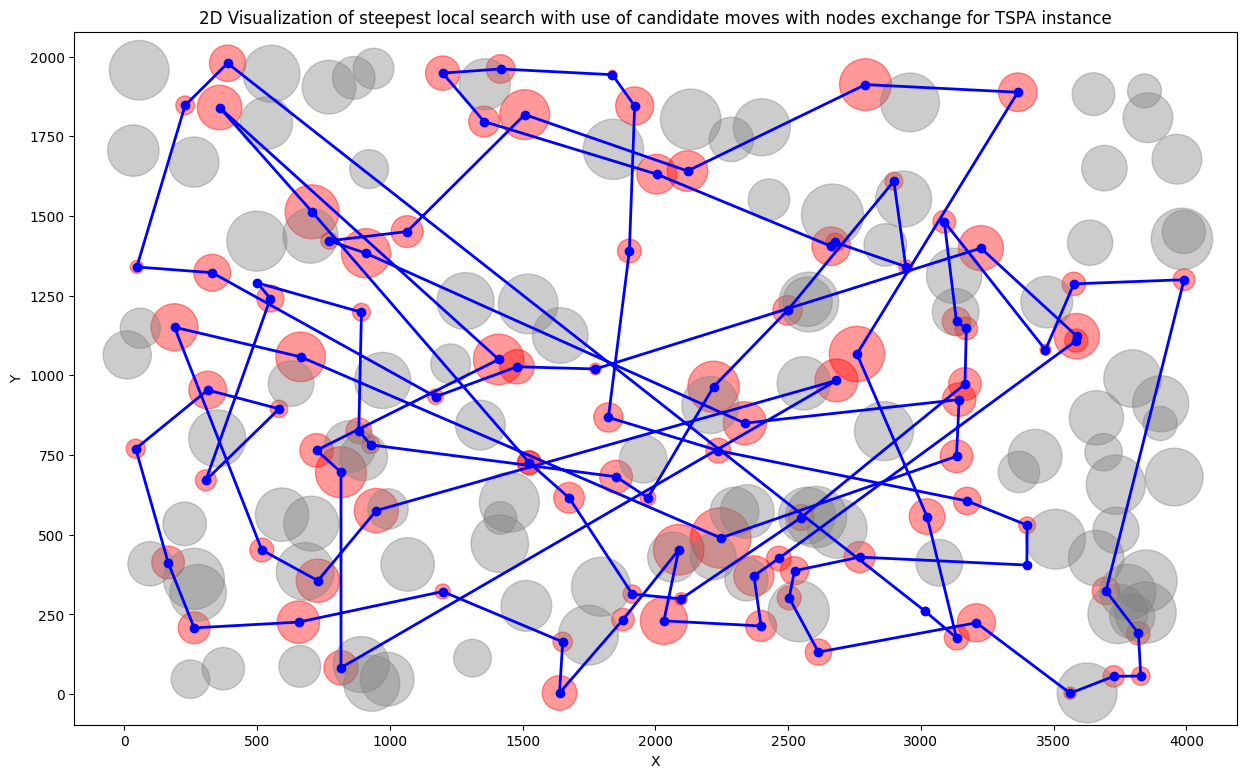

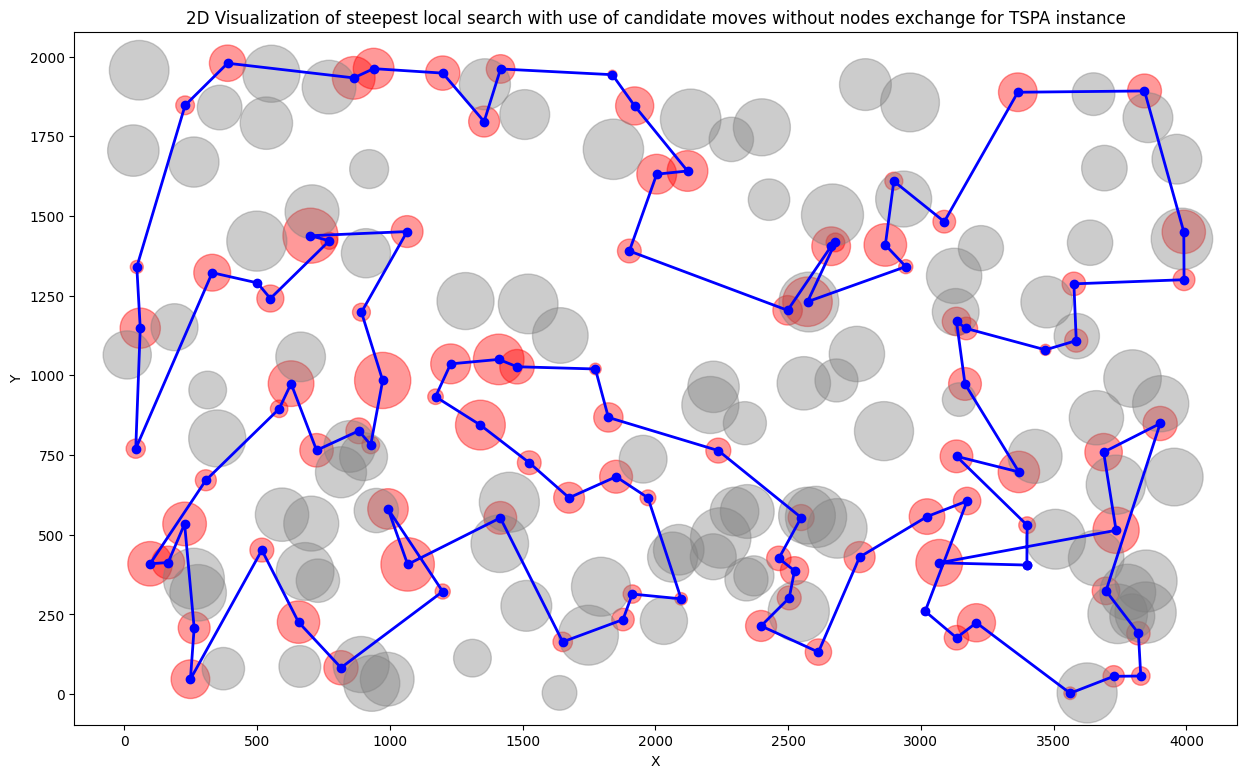

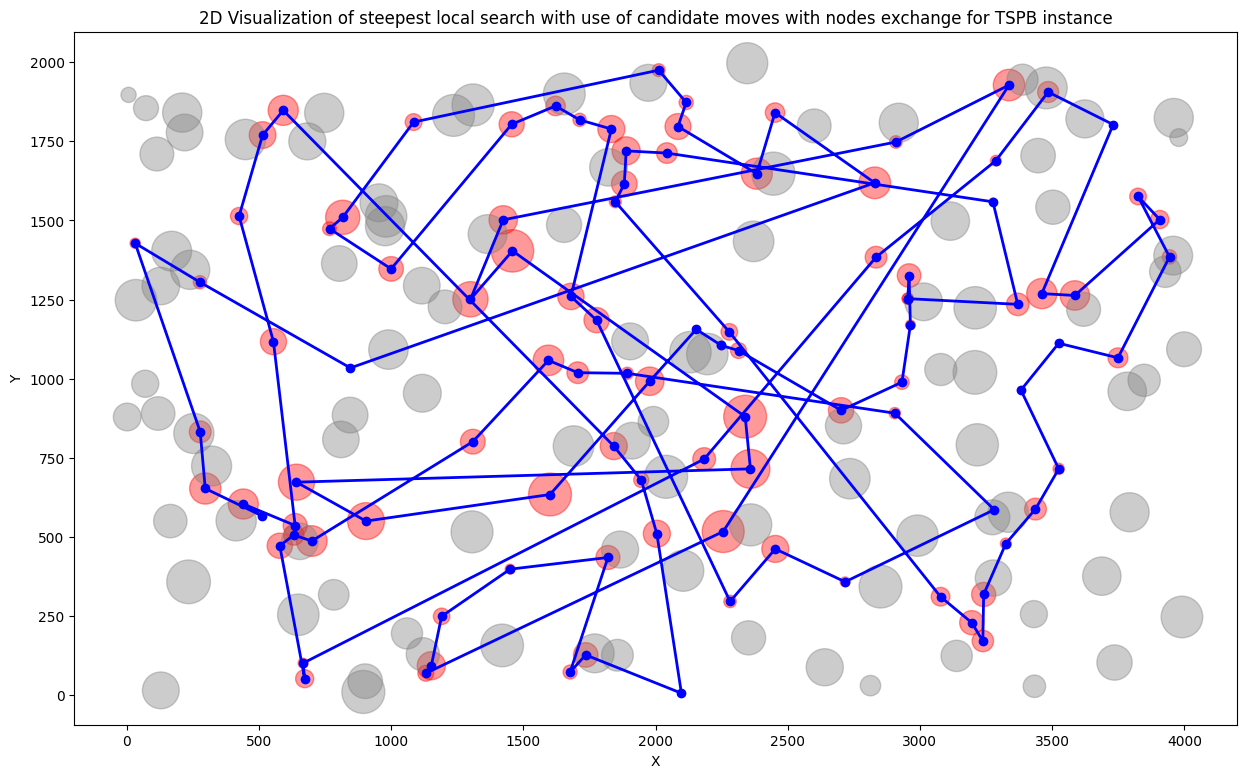

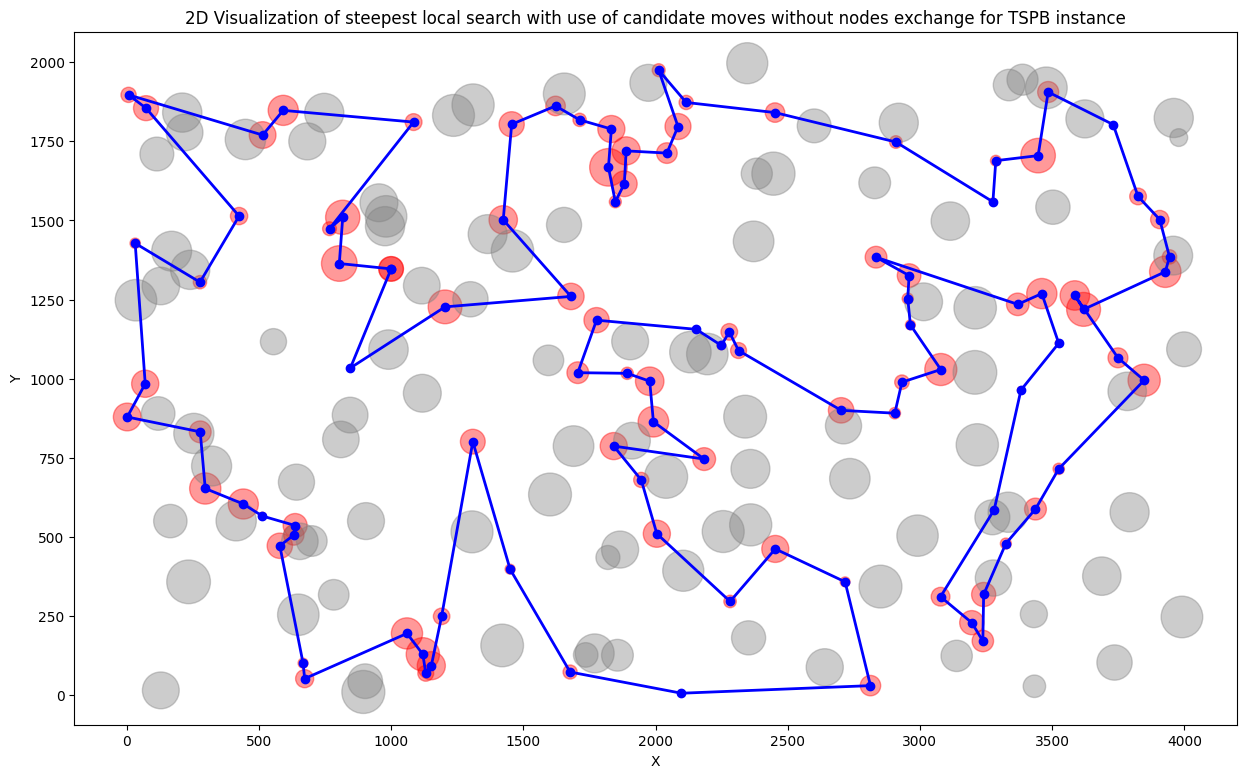

In [10]:
for i in instances:
    plot_tsp(*i)

## **5. Display of the results** ##

In [11]:
for i in instances:
    print(f"{i[2]}:")
    print(i[1])
    print()

2D Visualization of steepest local search with use of candidate moves with nodes exchange for TSPA instance:
[151 133 180  53 152  52 106 178  14 185 165  90  31 113 175 171  16  25
  75 101   1   2  78 145  92  94  80 137  89 183 143 117   0  23   9  62
  49 144 148  12  63  79  65 116 115 193  41 160  42 181  34  54 177  84
 123 135  70 154 182 158  86  26  97  40 119 138 176  51  59 159  22  18
 108 120  44 129 128  21  73 186 153  46 139 198 124  55  57  99  96 195
 184  35 131 167 112  77  43 109  69 110 151]

2D Visualization of steepest local search with use of candidate moves without nodes exchange for TSPA instance:
[ 78 145  57 179  52 178 106 185  40 165  90  27 164  21  14 144 102  49
  37  62   9 148 137  23 186  89 183 143   0 117  93 140 108  18  22 146
  34 159 193  41 139 191  46 115 197  65 116  43   5  42 160  30  54  48
 177  10 184  84 112 123 149  24 162 135 154 180  53  63  79 133 151  72
  59 118 109  51 176  80  94 152  97   1 101  86  75   2 129  92 120  44
  

## **6. Usage of solution checker**

Solution checker was used for all computed above solutions and value of objective functions are correct.

## **7. Link to the source code** ##

https://github.com/WojtekNagorka/Evolutionary-computation/tree/main/lab4

## **8. Conclusions**

1. Steepest descent search with candidate moves performs slightly worse than steepest search from previous labs
2. Although produced worse results, steepest search with candidates moves was noticably faster than "pure" steepest search
3. Edges exchange produced better results than nodes exchange